"""
Created on Sun May 28 19:51:21 2023

@author: gakro
"""

this program is to predict the final position of each driver in the race.
thus, the output should be the position (ordinal data from 1 to 20).
the inputs (which parameters to use and which year, race, and session to use)
and the appropriate algorithms should be considered.

training set: Bahrain, Saudi Arabia, Australia, Azerbaijan (all in 2023)
test set: Miami (2023)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import fastf1
import fastf1.plotting
from fastf1 import Cache

In [3]:
bahrain_quali = fastf1.get_session(2023, 1, "Q")
bahrain_quali.load(telemetry=True, laps=True, weather=True)

saudi_quali = fastf1.get_session(2023, 2, "Q")
saudi_quali.load(telemetry=True, laps=True, weather=True)

australia_quali = fastf1.get_session(2023, 3, "Q")
australia_quali.load(telemetry=True, laps=True, weather=True)

azerbaijan_quali = fastf1.get_session(2023, 4, "Q")
azerbaijan_quali.load(telemetry=True, laps=True, weather=True)

miami_quali = fastf1.get_session(2023, 5, "Q")
miami_quali.load(telemetry=True, laps=True, weather=True)

monaco_quali = fastf1.get_session(2023, 6, "Q")
monaco_quali.load(telemetry=True, laps=True, weather=True)

spain_quali = fastf1.get_session(2023, 7, "Q")
spain_quali.load(telemetry=True, laps=True, weather=True)

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: /Users/gakroppongi/Library/Caches/fastf1.
	Size: 1.15 GB
core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.0.3]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '55', '14', '63', '44', '18', '31', '27', '4', '77', '24', '22', '23', '2', '20', '81', '21', '10']
core           INFO 	Loading data for Saudi Arabian G

In [4]:
bahrain_race = fastf1.get_session(2023, 1, "R")
bahrain_race.load(telemetry=True, laps=True, weather=True)

saudi_race = fastf1.get_session(2023, 2, "R")
saudi_race.load(telemetry=True, laps=True, weather=True)

australia_race = fastf1.get_session(2023, 3, "R")
australia_race.load(telemetry=True, laps=True, weather=True)

azerbaijan_race = fastf1.get_session(2023, 4, "R")
azerbaijan_race.load(telemetry=True, laps=True, weather=True)

miami_race = fastf1.get_session(2023, 5, "R")
miami_race.load(telemetry=True, laps=True, weather=True)

monaco_race = fastf1.get_session(2023, 6, "R")
monaco_race.load(telemetry=True, laps=True, weather=True)

spain_race = fastf1.get_session(2023, 7, "R")
spain_race.load(telemetry=True, laps=True, weather=True)

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.0.3]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.0.3]
req            INFO 	Using cached data for drive

The following funciton named fastestLapTelemetryComparison returns the lap comparison between multiple driver for their fastest lap in the quali. 
year, gp, and identifier are the year, gp and identifier in which the sesison was held. They can be numbers of strings. 
drivers is the array of driver abbreviations in strings, such as "VER". 
driver_colors is the array of driver names used to identify the color of the plotting using .driver_color funciton.

In [22]:
def fastestLapTelemetryComparison(session, session_name, attribute, drivers, driver_colors): 
    Cache.enable_cache("/Users/gakroppongi/Library")
    fastf1.plotting.setup_mpl()

    if(len(attribute) != 1):

        axis = np.array([None for i in range(len(attribute))])
        fig, (axis) = plt.subplots(nrows=len(axis), sharex=True, subplot_kw=dict(frameon=False))  
        plt.subplots_adjust(hspace=0.1)
    
        axis[-1].set_xlabel('Distance in m')

        for h in range(len(axis)):

            axis[h].set_ylabel(attribute[h])
            axis[h].grid()

        for i in range(len(drivers)):
            lap = session.laps.pick_driver(drivers[i]).pick_fastest()
            tel = lap.get_car_data().add_distance()
            color = fastf1.plotting.driver_color(driver_colors[i])

            for j in range(len(axis)):
                axis[j].plot(tel['Distance'], tel[attribute[j]], color=color, label=drivers[i])

            
        axis[-1].legend()
        plt.suptitle(f"Fastest Lap Comparison \n "f"{session.event['EventName']} {session.event.year} {session_name}")
        plt.figure().set_size_inches(50000, 500000, forward=True)
        fig.set_dpi(1000)

        plt.show()

    else:
        fig, (ax) = plt.subplots(nrows=1, sharex=True, subplot_kw=dict(frameon=False))  
        plt.subplots_adjust(hspace=0.1)
    
        ax.set_xlabel('Distance in m')

        ax.set_ylabel(attribute[0])
        ax.grid()

        for i in range(len(drivers)):
            lap = session.laps.pick_driver(drivers[i]).pick_fastest()
            tel = lap.get_car_data().add_distance()
            color = fastf1.plotting.driver_color(driver_colors[i])
            ax.plot(tel['Distance'], tel[attribute[0]], color=color, label=drivers[i])

            
        ax.legend()
        plt.suptitle(f"Fastest Lap Comparison \n "f"{session.event['EventName']} {session.event.year} {session_name}")
        plt.figure().set_size_inches(50000, 500000, forward=True)
        fig.set_dpi(1000)

        plt.show()

lap = monaco_quali.laps.pick_driver("VER").pick_fastest()
tel = lap.get_car_data().add_distance()

now tel has the attributes below:
    'Date', 'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source', 'Time', 'SessionTime', 'Distance'

RPM, Speed, nGear, Throttle, Brake, DRS are useful data sets

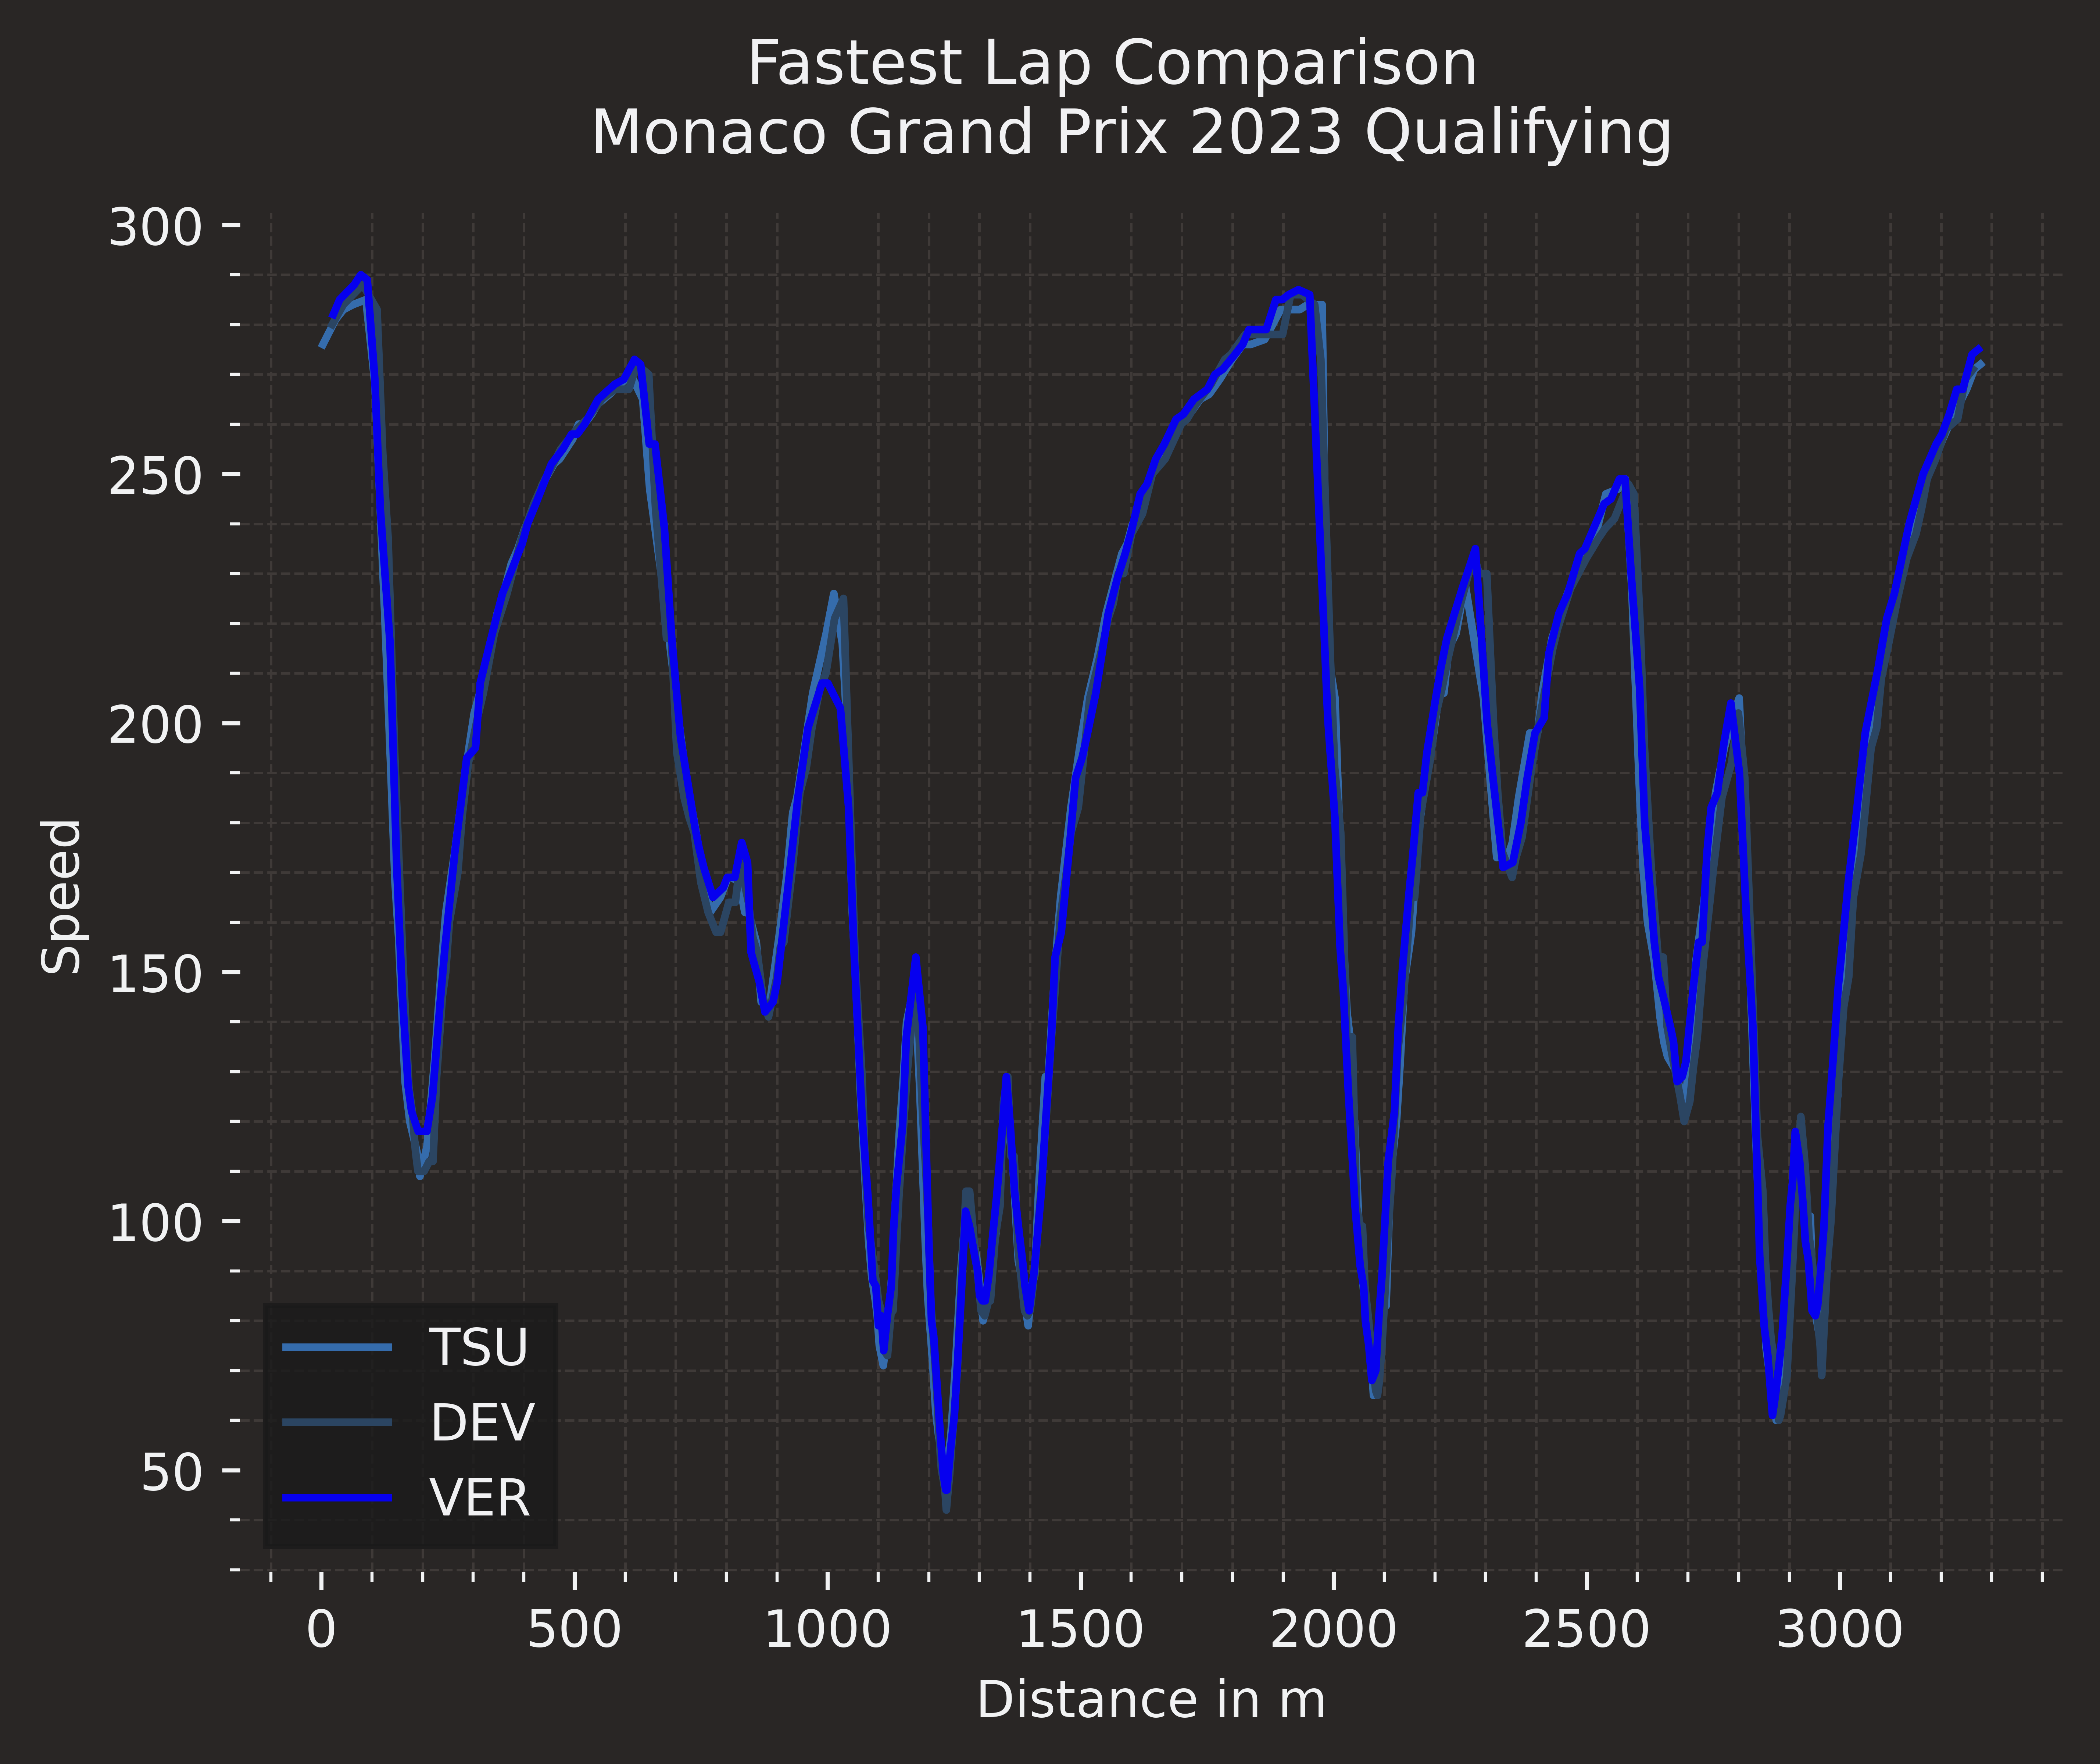

<Figure size 5e+06x5e+07 with 0 Axes>

In [24]:
session = monaco_quali
attribute = ['RPM', 'Speed', 'nGear', 'Throttle', 'Brake']
attribute = ["RPM", "Speed"]
drivers = ["TSU", "DEV", "VER"]
driver_color = ["yuki tsunoda", "nyck de vries", "max verstappen"]

#fastestLapTelemetryComparison(session, "Qualifying", attribute, drivers, driver_color)
#fastestLapTelemetryComparison(session, "Qualifying", ["Speed"], drivers, driver_color)